# Correlation
Show the relationship between two or more variables. Be mindful that, unless you tell them otherwise, many readers will assume the relationships you show them to be causal (i.e. one causes the other).

In [1]:
import pandas as pd
import numpy as np
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *
import utils

## Scatterplot
The standard way to show the relationship between two variables, each of which has its own axis.

In [2]:
df = pd.read_csv('data/scatterplot.csv')
df.head()

,State,OBESITY,BA OR HIGHER
0,AK,25.0,26.0
1,AL,32.0,22.0
2,AR,30.0,19.0
3,AZ,24.0,28.0
4,CA,24.0,32.0


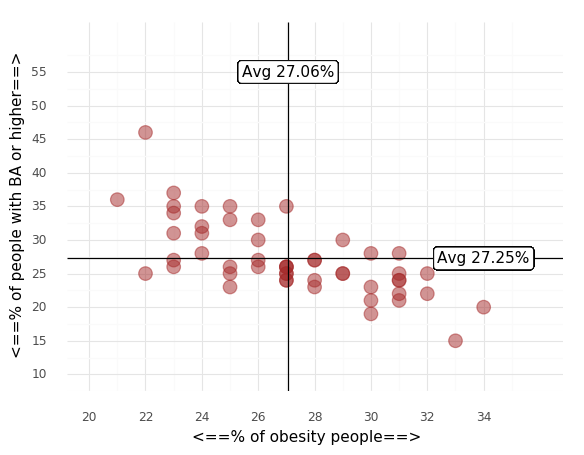

<ggplot: (8764527659766)>

In [3]:
g = (ggplot(df,aes(x='OBESITY',y='BA OR HIGHER')) +
     geom_point(size=5,alpha=0.5,color='brown') + theme_minimal() +
     #vertical and horizontal lines
     geom_vline(xintercept=df['OBESITY'].mean()) +
     geom_hline(yintercept=df['BA OR HIGHER'].mean()) +
     #annotate
     geom_label(aes(x=df['OBESITY'].mean(),y=55),
               label=f"Avg {round(df['OBESITY'].mean(),2)}%") +
     geom_label(aes(x=34,y=df['BA OR HIGHER'].mean()),
               label=f"Avg {round(df['BA OR HIGHER'].mean(),2)}%") +
     #x and y axis scales
     scale_y_continuous(limits=(10,60), breaks=range(10,60,5), 
                        labels=lambda x: [i if i%5==0 else '' for i in x]) +
     scale_x_continuous(limits=(20,36), breaks=range(20,36,2), 
                        labels=lambda x: [i if i%2==0 else '' for i in x]) +
    #axis labels
    xlab('<==% of obesity people==>') + ylab('<==% of people with BA or higher==>')
    )
g

## ~~Column + line timeline~~ Normalized line plot
~~A good way of showing the relationship over time between an amount (columns) and a rate (line).~~ Using two axes of different scales is not an advisable visualization practice as detailed by [Hadley Wickham's answer](https://stackoverflow.com/questions/3099219/ggplot-with-2-y-axes-on-each-side-and-different-scales). We suggest using a line plot where all values are normalized by the first value instead.

In [4]:
df = pd.read_csv('data/column-line-timeline.csv')
df.head()

,Order Date,Sales,Profit
0,2015 Mar,148895.5920,7622.4580
1,2015 Jun,173077.5192,22408.1384
2,2015 Sep,287266.4246,25609.4436
3,2015 Dec,359255.4604,43447.9082
4,2016 Mar,137703.4772,18529.8832


In [5]:
df_m = df.melt(id_vars='Order Date')
df_m.head()

,Order Date,variable,value
0,2015 Mar,Sales,148895.5920
1,2015 Jun,Sales,173077.5192
2,2015 Sep,Sales,287266.4246
3,2015 Dec,Sales,359255.4604
4,2016 Mar,Sales,137703.4772


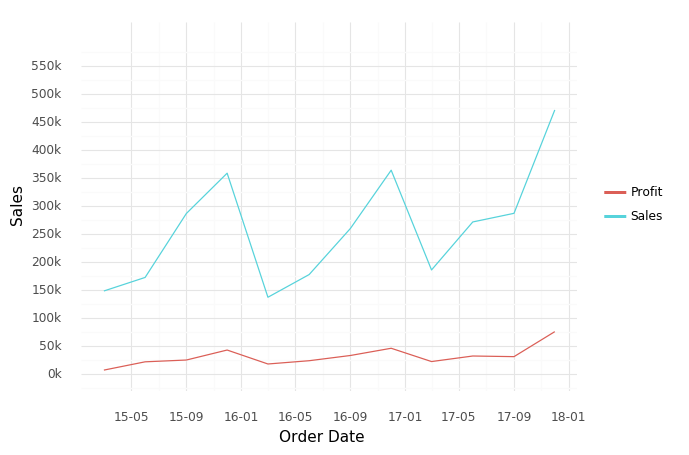

<ggplot: (-9223363272327930364)>

In [6]:
g = (ggplot(df_m,aes(x='Order Date',y='value',group='variable',color='variable')) +
     geom_line() + theme_minimal() +
     scale_x_date(labels=date_format('%y-%m')) +
     scale_y_continuous(limits=(0,600000),
                        breaks=range(0,600000,50000),
                        labels=utils.k_format()) +
     ylab('Sales') + xlab('Order Date') +
     theme(legend_title=element_blank())
    )
g

In [7]:
df['sales_start'] = df['Sales'][0]
df['profit_start'] = df['Profit'][0]
df['sales_one'] = df['Sales']/df['sales_start']
df['profit_one'] = df['Profit']/df['profit_start']
df = df[['Order Date','sales_one','profit_one']]
df.head()

,Order Date,sales_one,profit_one
0,2015 Mar,1.000000,1.000000
1,2015 Jun,1.162409,2.939752
2,2015 Sep,1.929314,3.359736
3,2015 Dec,2.412801,5.699987
4,2016 Mar,0.924832,2.430959


In [8]:
df_m = df.melt(id_vars='Order Date')
df_m.head()

,Order Date,variable,value
0,2015 Mar,sales_one,1.000000
1,2015 Jun,sales_one,1.162409
2,2015 Sep,sales_one,1.929314
3,2015 Dec,sales_one,2.412801
4,2016 Mar,sales_one,0.924832


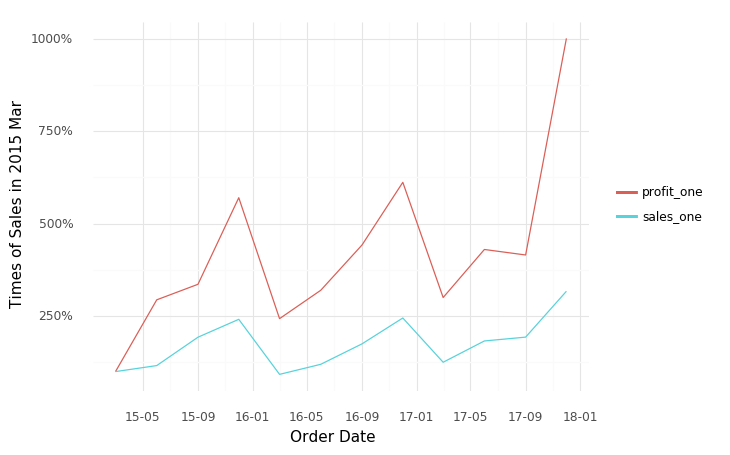

<ggplot: (-9223363272328001704)>

In [9]:
g = (ggplot(df_m,aes(x='Order Date',y='value',group='variable',color='variable')) +
     geom_line() + theme_minimal() +
     scale_x_date(labels=date_format('%y-%m')) +
     scale_y_continuous(labels=percent_format()) +
     ylab('Times of Sales in 2015 Mar') + xlab('Order Date') +
     theme(legend_title=element_blank())
    )
g

## Connected scatterplot
Usually used to show how the relationship between 2 variables has changed over time.

In [10]:
df = pd.read_csv('data/connected-scatterplot.csv')
df.head()

,Year,Bottom 90%,Top 0.01%
0,1917,0.205,0.094
1,1919,0.206,0.069
2,1921,0.226,0.049
3,1923,0.207,0.052
4,1925,0.177,0.067


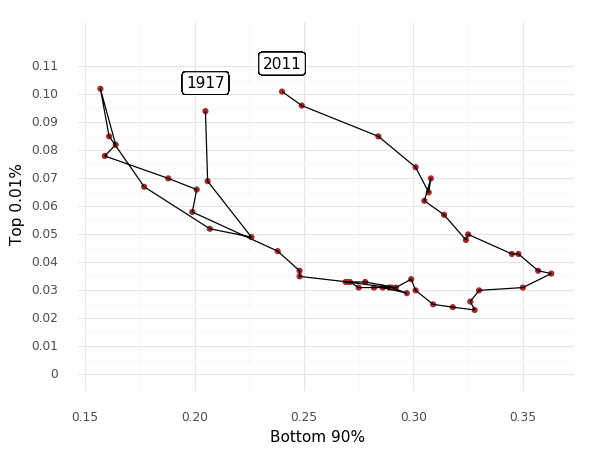

<ggplot: (8764526857080)>

In [11]:
g = (ggplot(df,aes(x='Bottom 90%',y='Top 0.01%')) +
     geom_point(color='brown') + 
     geom_path() + #use geom_path to connect in order
     theme_minimal() +
     #annotate
     geom_label(aes(x=df.iloc[0,1],y=df.iloc[0,2]),
               label=df.iloc[0,0],nudge_y=0.01) +
     geom_label(aes(x=df.iloc[-1,1],y=df.iloc[-1,2]),
               label=df.iloc[-1,0],nudge_y=0.01) +
    scale_y_continuous(limits=(0,0.12), breaks=[i/100 for i in range(0,12,1)]) +
    #axis labels
    xlab('Bottom 90%') + ylab('Top 0.01%')
    )
g

## Bubble
Like a scatterplot, but adds additional detail by sizing the circles according to a third variable.

In [12]:
df = pd.read_csv('data/bubble.csv')
df.head()

,Sub-Category,Year,Avg Discount,Profit,Sales
0,Tables,2018,0.265,-8140.6947,60893.5425
1,Tables,2017,0.268,-2950.9418,60833.2005
2,Tables,2016,0.237,-3509.8019,39150.4235
3,Tables,2015,0.267,-3124.0427,46088.3655
4,Supplies,2018,0.071,-955.3128,16049.4100


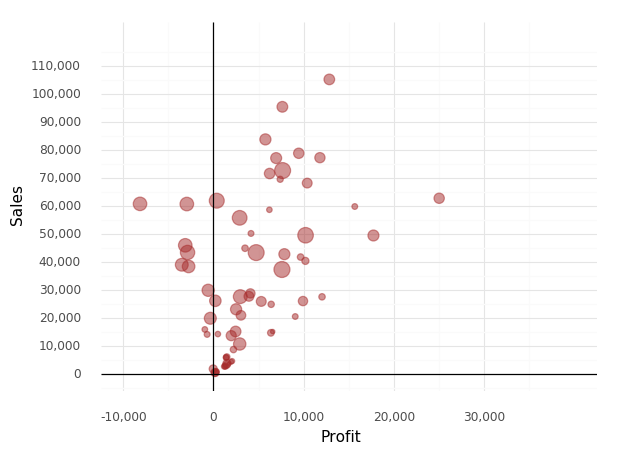

<ggplot: (8764526722873)>

In [13]:
g = (ggplot(df,aes(x='Profit',y='Sales',size='Avg Discount')) +
     geom_point(color='brown',alpha=0.5) + 
     theme_minimal() + geom_vline(xintercept=0) + geom_hline(yintercept=0) +
    scale_y_continuous(limits=(0,120000), breaks=range(0,120000,10000),
                       labels=currency_format(big_mark=',',prefix='',digits=0)) +
    scale_x_continuous(limits=(-10000,40000), breaks=range(-10000,40000,10000),
                       labels=currency_format(big_mark=',',prefix='',digits=0)) +
    #axis labels
    xlab('Profit') + ylab('Sales') + theme(legend_position='none')
    )
g

## XY Heatmap
A good way of showing the patterns between 2 categories of data, less good at showing fine differences in amounts.

In [14]:
df = pd.read_csv('data/xy-heatmap.csv')
df.head()

,Age Range,Savings Amount,Response Rate
0,65+,"$10,000 or more",20.0
1,55-64,"$10,000 or more",16.8
2,45-54,"$10,000 or more",16.2
3,35-44,"$10,000 or more",16.0
4,25-34,"$10,000 or more",12.1


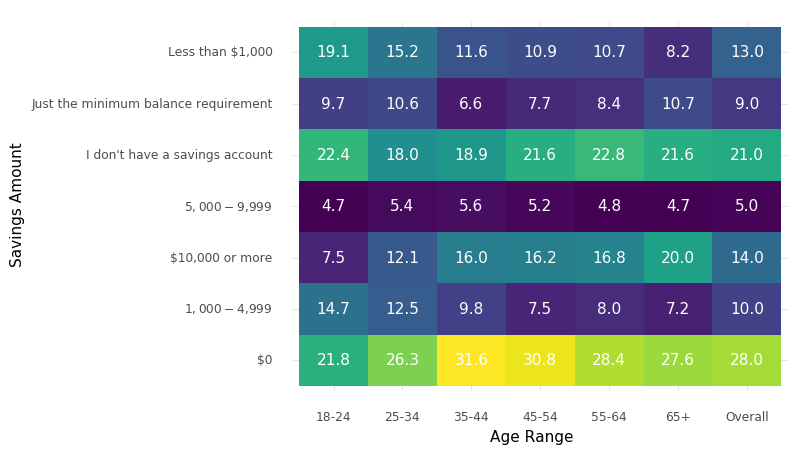

<ggplot: (-9223363272328000596)>

In [15]:
g = (ggplot(df,aes(x='Age Range', y ='Savings Amount', 
                   label='Response Rate', fill='Response Rate')) +
     geom_tile() + geom_text(color='white') +
     theme_minimal() + theme(legend_position='none')
    ) 
g